## Processamento de Alto Desempenho (CAP-241-4)

Repositório para armazenar exercícios e experimentos criados para a matéria de Processamento de Alto Desempenho do curso de Computação Aplicada 1 (CAP-241-4) do programa de pós-graduação em Computação Aplicada do Instituto Nacional de Pesquisas Espaciais (INPE)


In [1]:
import pandas as pd
import numpy as np
from plotnine import *

import warnings
warnings.filterwarnings("ignore")

1) Considere uma tarefa que pode ser dividida em sub-tarefas com durações de 15, 25, 30 e 20 segundos, respectivamente. Cada sub-tarefa é executada por um módulo especializado, e a execução é feita em modo pipeline.

- (a) Qual é o tempo de ciclo mínimo para o pipeline ?
- (b) Supondo que  existam  100  tarefas  a  executar,  qual  o speedupem  relação  à execução num modo estritamente serial?
- (c) Caso seja possível subdividir umadas sub-tarefas em duas novas sub-tarefas de igual  duração,  associando  um  módulo  para a execução de cada uma, qual das sub-tarefas deve ser escolhida para divisão?
- (d)Após a divisão proposta no ítem anterior, qual o novo speedup possível em relação à execução estritamente serial das 100 tarefas?

In [2]:
# ToDo

2) Considere  a  expressão  para  o  speedup vista  em  aula, SP=1/(1-f+f/P).  Plote  o  speedup como  função  do  número  de  processadores  (P),  dentro  do  intervalo    $1 \leq P \leq 128$, supondo que a fração paralelizável (f) de um programa corresponde a: 

- (a) 98%
- (b) 80%

Para a realização do exercício, inicialmente é feita a definição da função de `Amdahl`, apresentada no exercício e vista em sala de aula, que expressa a relação de SpeedUp.

In [3]:
def speedup_amdahl(f, p, unique = False):
    if unique:
        p = np.array([p])
    
    return pd.DataFrame({
        'f': f,
        'p': p,
        'speedup': 1 / (1 - f + (f / p))
    })

Para a realização do exercício, primeiro é feito a definição da função que expressa a relação de `SpeedUp` de `Amdahl`, com isto, o intervalo

In [4]:
quantidade_de_processadores = np.arange(1, 129)

questao_a = speedup_amdahl(0.98, quantidade_de_processadores)
questao_b = speedup_amdahl(0.80, quantidade_de_processadores)

In [5]:
1 / (1 - 0.98) # Limite máximo

49.99999999999996

In [6]:
len(questao_a)

128

In [7]:
questao_a['speedup'].max()

36.15819209039546

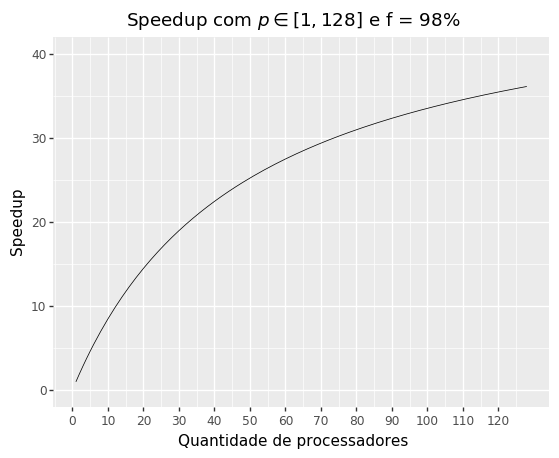

<ggplot: (99495830469)>

In [8]:
(ggplot(questao_a, aes(x = 'p', y = 'speedup'))
    + geom_line(size = 0.3)
    + ylim(0, 40)
    + xlab('Quantidade de processadores') + ylab('Speedup')
    + scale_x_continuous(breaks = np.arange(0, 128, 10))
    + ggtitle('Speedup com $p \in [1, 128]$ e f = 98%'))

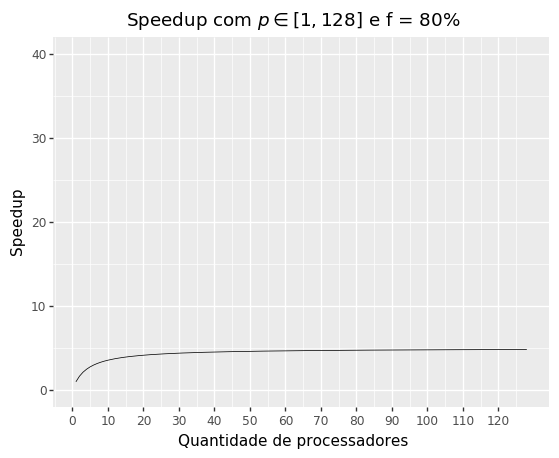

<ggplot: (-9223371937358566186)>

In [9]:
(ggplot(questao_b, aes(x = 'p', y = 'speedup'))
    + geom_line(size = 0.3)
    + ylim(0, 40) + xlim(0, 128)
    + xlab('Quantidade de processadores') + ylab('Speedup')
    + scale_x_continuous(breaks = np.arange(0, 128, 10))
    + ggtitle('Speedup com $p \in [1, 128]$ e f = 80%'))

3) Plote  agora  o  speedup  em  função  da  fração  paralelizável (f)  de  um  programa,  para  o intervalo  $0 < f < 1$, supondo um sistema com:

- (a) 8 processadores
- (b)128 processadores

In [10]:
intervalo_fracao_paralelizavel = np.arange(0.1, 1, 0.1)

In [11]:
questao_a = speedup_amdahl(intervalo_fracao_paralelizavel, 8)
questao_b = speedup_amdahl(intervalo_fracao_paralelizavel, 128)

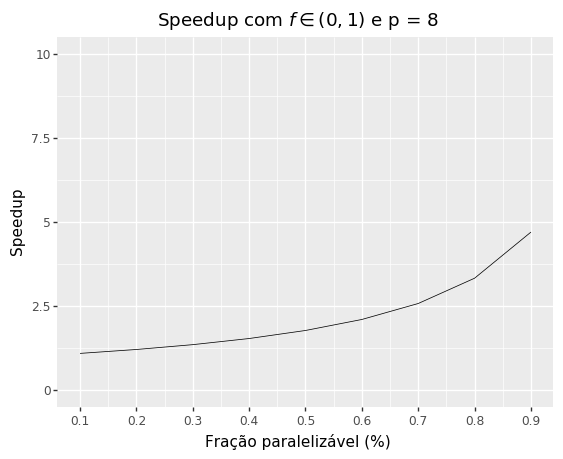

<ggplot: (-9223371937358558590)>

In [12]:
(ggplot(questao_a, aes(x = 'f', y = 'speedup'))
    + geom_line(size = 0.3)
    + xlab('Fração paralelizável (%)') + ylab('Speedup')
    + ylim(0, 10)
    + scale_x_continuous(breaks = questao_a['f'])
    + ggtitle('Speedup com $f \in (0, 1)$ e p = 8'))

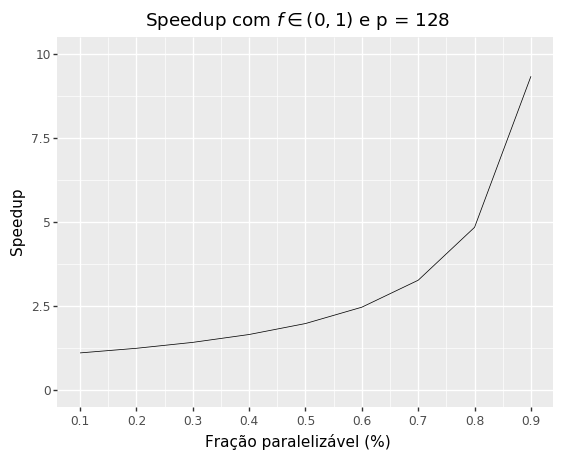

<ggplot: (99496189511)>

In [13]:
(ggplot(questao_b, aes(x = 'f', y = 'speedup'))
    + geom_line(size = 0.3)
    + xlab('Fração paralelizável (%)') + ylab('Speedup')
    + ylim(0, 10)
    + scale_x_continuous(breaks = questao_b['f'])
    + ggtitle('Speedup com $f \in (0, 1)$ e p = 128'))

4) Considere um programa no qual a fração paralelizável corresponde a  90%  do tempo de uma execução convencional em um processador. 

- (a) Calcule o speedup que seria obtido num sistema com 16 processadores.
- (b) Calcule o speedup que seria obtido num sistema com 64 processadores.
- (c) Quantas vezes o sistema com 64 processadores é mais rápido que o sistema com 16 processadores para este programa?
- (d) Quantos  processadores  são  necessários  para  executar  este  programa  na  metade do tempo da execução no sistema com 16 processadores? (Justifique a resposta)

* (a) Calcule o speedup que seria obtido num sistema com 16 processadores.

In [14]:
def eficiencia_paralela(speedup, p):
    return speedup / p

In [17]:
questao_a = speedup_amdahl(.90, 16, True)

* (b) Calcule o speedup que seria obtido num sistema com 64 processadores.

In [18]:
questao_b = speedup_amdahl(.90, 64, True)

* (c) Quantas vezes o sistema com 64 processadores é mais rápido que o sistema com 16 processadores para este programa?

In [ ]:
questao_a['speedup']

In [ ]:
questao_b['speedup'] / questao_a['speedup']

Mesmo o caso que utiliza 64 processadores ter apresentado um `speedup` maior, vejamos a eficiência paralela de cada um desses sistemas.

In [ ]:
eficiencia_paralela(questao_a['speedup'], 16)

In [ ]:
eficiencia_paralela(questao_b['speedup'], 64)

Com isto é possível perceber que, mesmo o sistema com menor quantidade de recurso tendo speedup mais lento, o mesmo apresenta um uso mais efetivo dos recursos computacionais disponíveis, neste caso, os processadores.

* (d) Quantos processadores são necessários para executar este programa na metade do tempo da execução no sistema com 16 processadores? (Justifique a resposta)

In [21]:
questao_d = speedup_amdahl(.90, 16, True)

Para este exercício, antes de realizar testes aplicando a lei de Amdahl para verificar a quantidade de processadores necessários, o que computacionalmente poderia ser realizado de forma simples, façamos a análise do Speedup máximo que este programa pode alcançar.

In [34]:
speedup_maximo_amdahl = lambda f: 1 / (1 - f)

In [35]:
speedup_maximo_amdahl(0.90)

10.000000000000002

Ao executar o código e verificar que o speedum máximo, para este contexto, é de 10, percebemos que não é possível melhorar a execução a ponto de diminuir sua execução pela metadade do que foi alcançado com 16 processadores. Para confirmar tal questão, abaixo é feito a visualização da variação do valor de $P$ no intervalo $0 \le P \le 5000$.

> A quantidade de processadores considerados é bem alta, porém é feita apenas como forma de confirmação da identificação feita no cálculo do Speedup máximo com a lei de Amdahl.

In [37]:
speedup_de_teste = speedup_amdahl(.90, np.arange(0, 5000, 1))

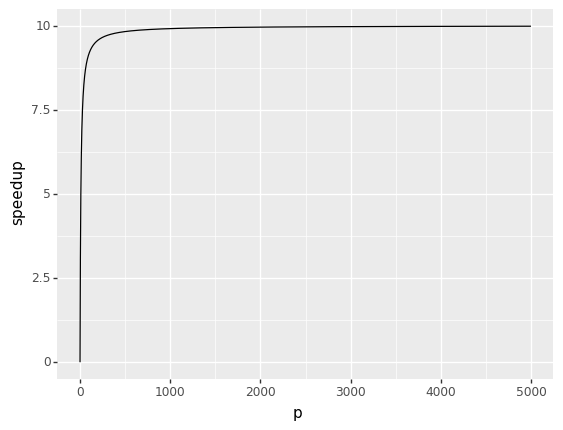

<ggplot: (99498601578)>

In [42]:
(ggplot(speedup_de_teste, aes(x = 'p', y = 'speedup')) + geom_line(size = 0.5))

5) Utilizando  as  mesmas  escalas  dos  gráficos  construídos  acima  em `2-a` e em  `3-a`, respectivamente, plote o `speedup-em-escala` para os seguintes casos:

- (a) $f = 98\% ,  1 \le P \le 128$
- (b) 8 processadores ,  $0 < f < 1$

In [ ]:
def speedup_gustafson(f, p):
    return pd.DataFrame({
        'f': f,
        'p': p,
        'speedup': (p-1) * (f + 1)
    })

In [ ]:
questao_a = speedup_gustafson(0.98, np.arange(1, 129))
questao_b = speedup_gustafson(np.arange(0.1, 1, 0.1), 8)

In [ ]:
(ggplot(questao_a, aes(x = 'p', y = 'speedup'))
    + geom_line(size = 0.3)
    + ylim(0, 40) + xlim(0, 128)
    + xlab('Quantidade de processadores') + ylab('Speedup')
    + scale_x_continuous(breaks = np.arange(0, 128, 10))
    + ggtitle('Speedup com $p \in [1, 128]$ e f = 98%'))

In [ ]:
(ggplot(questao_b, aes(x = 'f', y = 'speedup'))
    + geom_line(size = 0.3)
    + xlab('Fração paralelizável (%)') + ylab('Speedup')
    + ylim(0, 10)
    + scale_x_continuous(breaks = questao_b['f'])
    + ggtitle('Speedup com $f \in (0, 1)$ e p = 8'))